In [1]:
import pandas as pd 
import numpy as np 
from dtw import *
import gower
import matplotlib.pyplot as plt

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [2]:
df = pd.read_csv("/home/nils/projects/research_project_frequency_analysis/lcs_analysis/5314-201703.encoded.csv")
df.columns = ["timestamps", "events"]
df.timestamps = pd.to_datetime(df.timestamps, unit="s")
df["date"] = df.timestamps.map(lambda x: x.date())
df

timestamps    events        date
0     2017-02-28 23:00:01  85f5c18b  2017-02-28
1     2017-02-28 23:00:01  85f5c18b  2017-02-28
2     2017-02-28 23:00:02  70083fd2  2017-02-28
3     2017-02-28 23:01:01  85f5c18b  2017-02-28
4     2017-02-28 23:01:01  276ebc63  2017-02-28
...                   ...       ...         ...
52447 2017-03-31 21:55:01  85f5c18b  2017-03-31
52448 2017-03-31 21:59:33  760c5208  2017-03-31
52449 2017-03-31 21:59:33  bba3d47c  2017-03-31
52450 2017-03-31 21:59:33  f9cfa0b9  2017-03-31
52451 2017-03-31 21:59:33  ed9738ca  2017-03-31

[52452 rows x 3 columns]

In [3]:
df_days = [e[1] for e in df.groupby(df.timestamps.map(lambda x: x.day))]

In [4]:
df_days[0]

timestamps    events        date
66   2017-03-01 00:00:01  85f5c18b  2017-03-01
67   2017-03-01 00:00:01  85f5c18b  2017-03-01
68   2017-03-01 00:00:01  85f5c18b  2017-03-01
69   2017-03-01 00:00:01  70083fd2  2017-03-01
70   2017-03-01 00:01:01  85f5c18b  2017-03-01
...                  ...       ...         ...
3152 2017-03-01 23:57:37  bba3d47c  2017-03-01
3153 2017-03-01 23:57:37  f9cfa0b9  2017-03-01
3154 2017-03-01 23:57:37  ed9738ca  2017-03-01
3155 2017-03-01 23:58:09  23666bbc  2017-03-01
3156 2017-03-01 23:59:39  23666bbc  2017-03-01

[3091 rows x 3 columns]

In [5]:
df_hours = [e[1] for e in df.groupby(df.timestamps.map(lambda x: x.hour))]


In [6]:
{hour.timestamps.iloc[0].hour: len(hour) for hour in df_hours}
# The number of events in every timestamp are VERY nonuniform - Hard to compare using DTW

{0: 1944,
 1: 2085,
 2: 2288,
 3: 1843,
 4: 1809,
 5: 2024,
 6: 1902,
 7: 1806,
 8: 1662,
 9: 1651,
 10: 3240,
 11: 1862,
 12: 1975,
 13: 1985,
 14: 2623,
 15: 3417,
 16: 3216,
 17: 1673,
 18: 1651,
 19: 1717,
 20: 2994,
 21: 1698,
 22: 1935,
 23: 3452}

In [7]:
df_1_hours = [e[1] for e in df.groupby(df_days[0].timestamps.map(lambda x: x.hour))]
{hour.timestamps.iloc[0].hour: len(hour) for hour in df_1_hours}
# Similar for only one day => Both are expected

{0: 58,
 1: 56,
 2: 73,
 3: 52,
 4: 52,
 5: 64,
 6: 54,
 7: 54,
 8: 76,
 9: 64,
 10: 76,
 11: 52,
 12: 66,
 13: 162,
 14: 76,
 15: 66,
 16: 129,
 17: 54,
 18: 53,
 19: 54,
 20: 1416,
 21: 94,
 22: 95,
 23: 95}

In [8]:
[
    print(i,
        {
            hour.timestamps.iloc[0].hour: len(hour) for hour in  
            [e[1] for e in df.groupby(day.timestamps.map(lambda x: x.hour))]
        }, "\n"
    )
        for i, day in
    enumerate(df_days)
]
# NUmber of events for every hour across the days

0 {0: 58, 1: 56, 2: 73, 3: 52, 4: 52, 5: 64, 6: 54, 7: 54, 8: 76, 9: 64, 10: 76, 11: 52, 12: 66, 13: 162, 14: 76, 15: 66, 16: 129, 17: 54, 18: 53, 19: 54, 20: 1416, 21: 94, 22: 95, 23: 95} 

1 {0: 96, 1: 96, 2: 113, 3: 92, 4: 92, 5: 70, 6: 54, 7: 52, 8: 52, 9: 52, 10: 61, 11: 116, 12: 54, 13: 105, 14: 52, 15: 55, 16: 54, 17: 53, 18: 52, 19: 52, 20: 52, 21: 53, 22: 54, 23: 55} 

2 {0: 55, 1: 55, 2: 73, 3: 52, 4: 52, 5: 52, 6: 54, 7: 52, 8: 52, 9: 52, 10: 52, 11: 65, 12: 77, 13: 52, 14: 52, 15: 54, 16: 52, 17: 52, 18: 52, 19: 52, 20: 52, 21: 52, 22: 54, 23: 56} 

3 {0: 57, 1: 55, 2: 75, 3: 54, 4: 54, 5: 52, 6: 54, 7: 52, 8: 54, 9: 52, 10: 52, 11: 52, 12: 54, 13: 52, 14: 52, 15: 54, 16: 52, 17: 53, 18: 53, 19: 52, 20: 52, 21: 52, 22: 53, 23: 56} 

4 {0: 57, 1: 55, 2: 73, 3: 52, 4: 52, 5: 52, 6: 54, 7: 52, 8: 52, 9: 52, 10: 52, 11: 48, 12: 52, 13: 58, 14: 869, 15: 103, 16: 53, 17: 52, 18: 52, 19: 52, 20: 52, 21: 52, 22: 53, 23: 55} 

5 {0: 56, 1: 62, 2: 73, 3: 101, 4: 54, 5: 65, 6: 55, 7: 

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [24]:
events_hour_day = [
        {
            hour.timestamps.iloc[0].hour: len(hour) for hour in  
            [e[1] for e in df.groupby(day.timestamps.map(lambda x: x.hour))]
        }
    
        for i, day in    enumerate(df_days)
]
# NUmber of events for every hour across the days

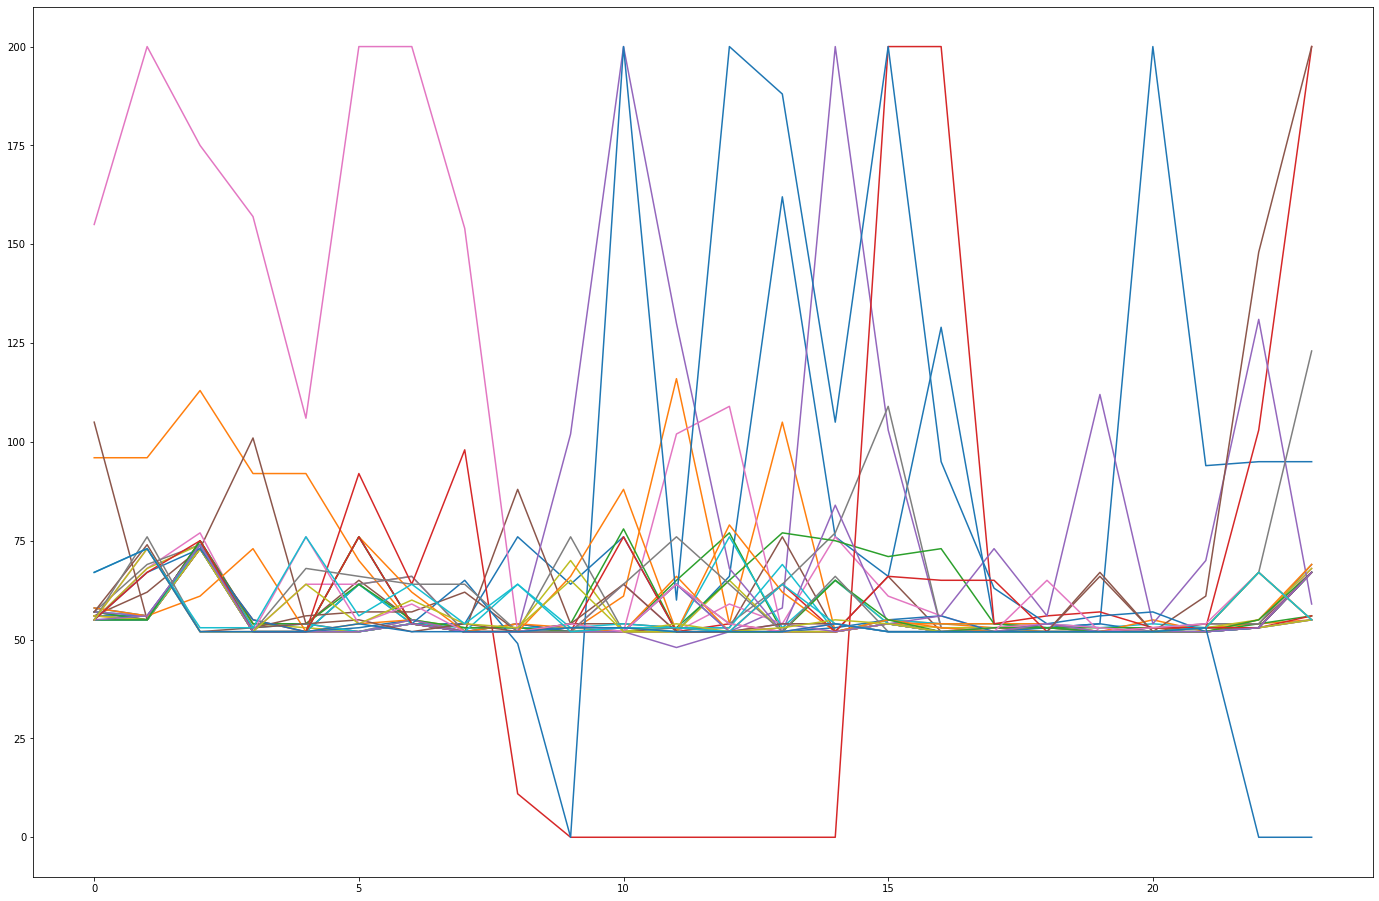

In [29]:
plt.figure(figsize=(24,16))
for day in events_hour_day:
    ev = np.zeros(24)
    for k, v in day.items():
        ev[k] = 200 if v > 200 else v
    plt.plot(ev)

In [170]:
# only consider a single event per minute to make comparison easier (possible?)
events_day_hour_minute = [
    [
        [
            minute.iloc[0].events for minute in
             [e[1] for e in df.groupby(hour.timestamps.map(lambda x: x.minute))]
        ]
        for hour in  
        [e[1] for e in df.groupby(day.timestamps.map(lambda x: x.hour))]
    ] for day in
    [e[1] for e in df.groupby(df.timestamps.map(lambda x: x.day))]
]


# Problems comparing (using DTW)
- Different number of events per hour for the days => Cant directly compare anyways
- DTW is not really usable for time series which are irregular in spacing - such as here
- Resampling would be the common approach, not applicable here

In [37]:
start = df.timestamps.iloc[0]
total = df.timestamps.iloc[-1]
length = total - start
length/pd.to_timedelta("15min")

2971.968888888889

In [38]:
pd.interval_range(start, periods= length/pd.to_timedelta("15min"), freq="15min")

IntervalIndex([(2017-02-28 23:00:01, 2017-02-28 23:15:01], (2017-02-28 23:15:01, 2017-02-28 23:30:01], (2017-02-28 23:30:01, 2017-02-28 23:45:01], (2017-02-28 23:45:01, 2017-03-01 00:00:01], (2017-03-01 00:00:01, 2017-03-01 00:15:01] ... (2017-03-31 20:30:01, 2017-03-31 20:45:01], (2017-03-31 20:45:01, 2017-03-31 21:00:01], (2017-03-31 21:00:01, 2017-03-31 21:15:01], (2017-03-31 21:15:01, 2017-03-31 21:30:01], (2017-03-31 21:30:01, 2017-03-31 21:45:01]],
              closed='right',
              dtype='interval[datetime64[ns]]')

In [17]:
events_discrete

array([[['85f5c18b', '85f5c18b', '85f5c18b', ..., '85f5c18b',
         '85f5c18b', '85f5c18b'],
        ['85f5c18b', '85f5c18b', '85f5c18b', ..., '85f5c18b',
         '85f5c18b', '85f5c18b'],
        ['85f5c18b', '85f5c18b', '85f5c18b', ..., '85f5c18b',
         '85f5c18b', '85f5c18b'],
        ...,
        ['empty', 'empty', 'empty', ..., 'empty', 'empty', 'empty'],
        ['empty', 'empty', 'empty', ..., 'empty', 'empty', 'empty'],
        ['empty', 'empty', 'empty', ..., 'empty', 'empty', 'empty']],

       [['85f5c18b', '85f5c18b', '85f5c18b', ..., '85f5c18b',
         '85f5c18b', '85f5c18b'],
        ['85f5c18b', '85f5c18b', '85f5c18b', ..., '85f5c18b',
         '85f5c18b', '85f5c18b'],
        ['85f5c18b', '85f5c18b', '85f5c18b', ..., '85f5c18b',
         '85f5c18b', '85f5c18b'],
        ...,
        ['empty', 'empty', 'empty', ..., 'empty', 'empty', 'empty'],
        ['empty', 'empty', 'empty', ..., 'empty', 'empty', 'empty'],
        ['empty', 'empty', 'empty', ..., 'empty', '

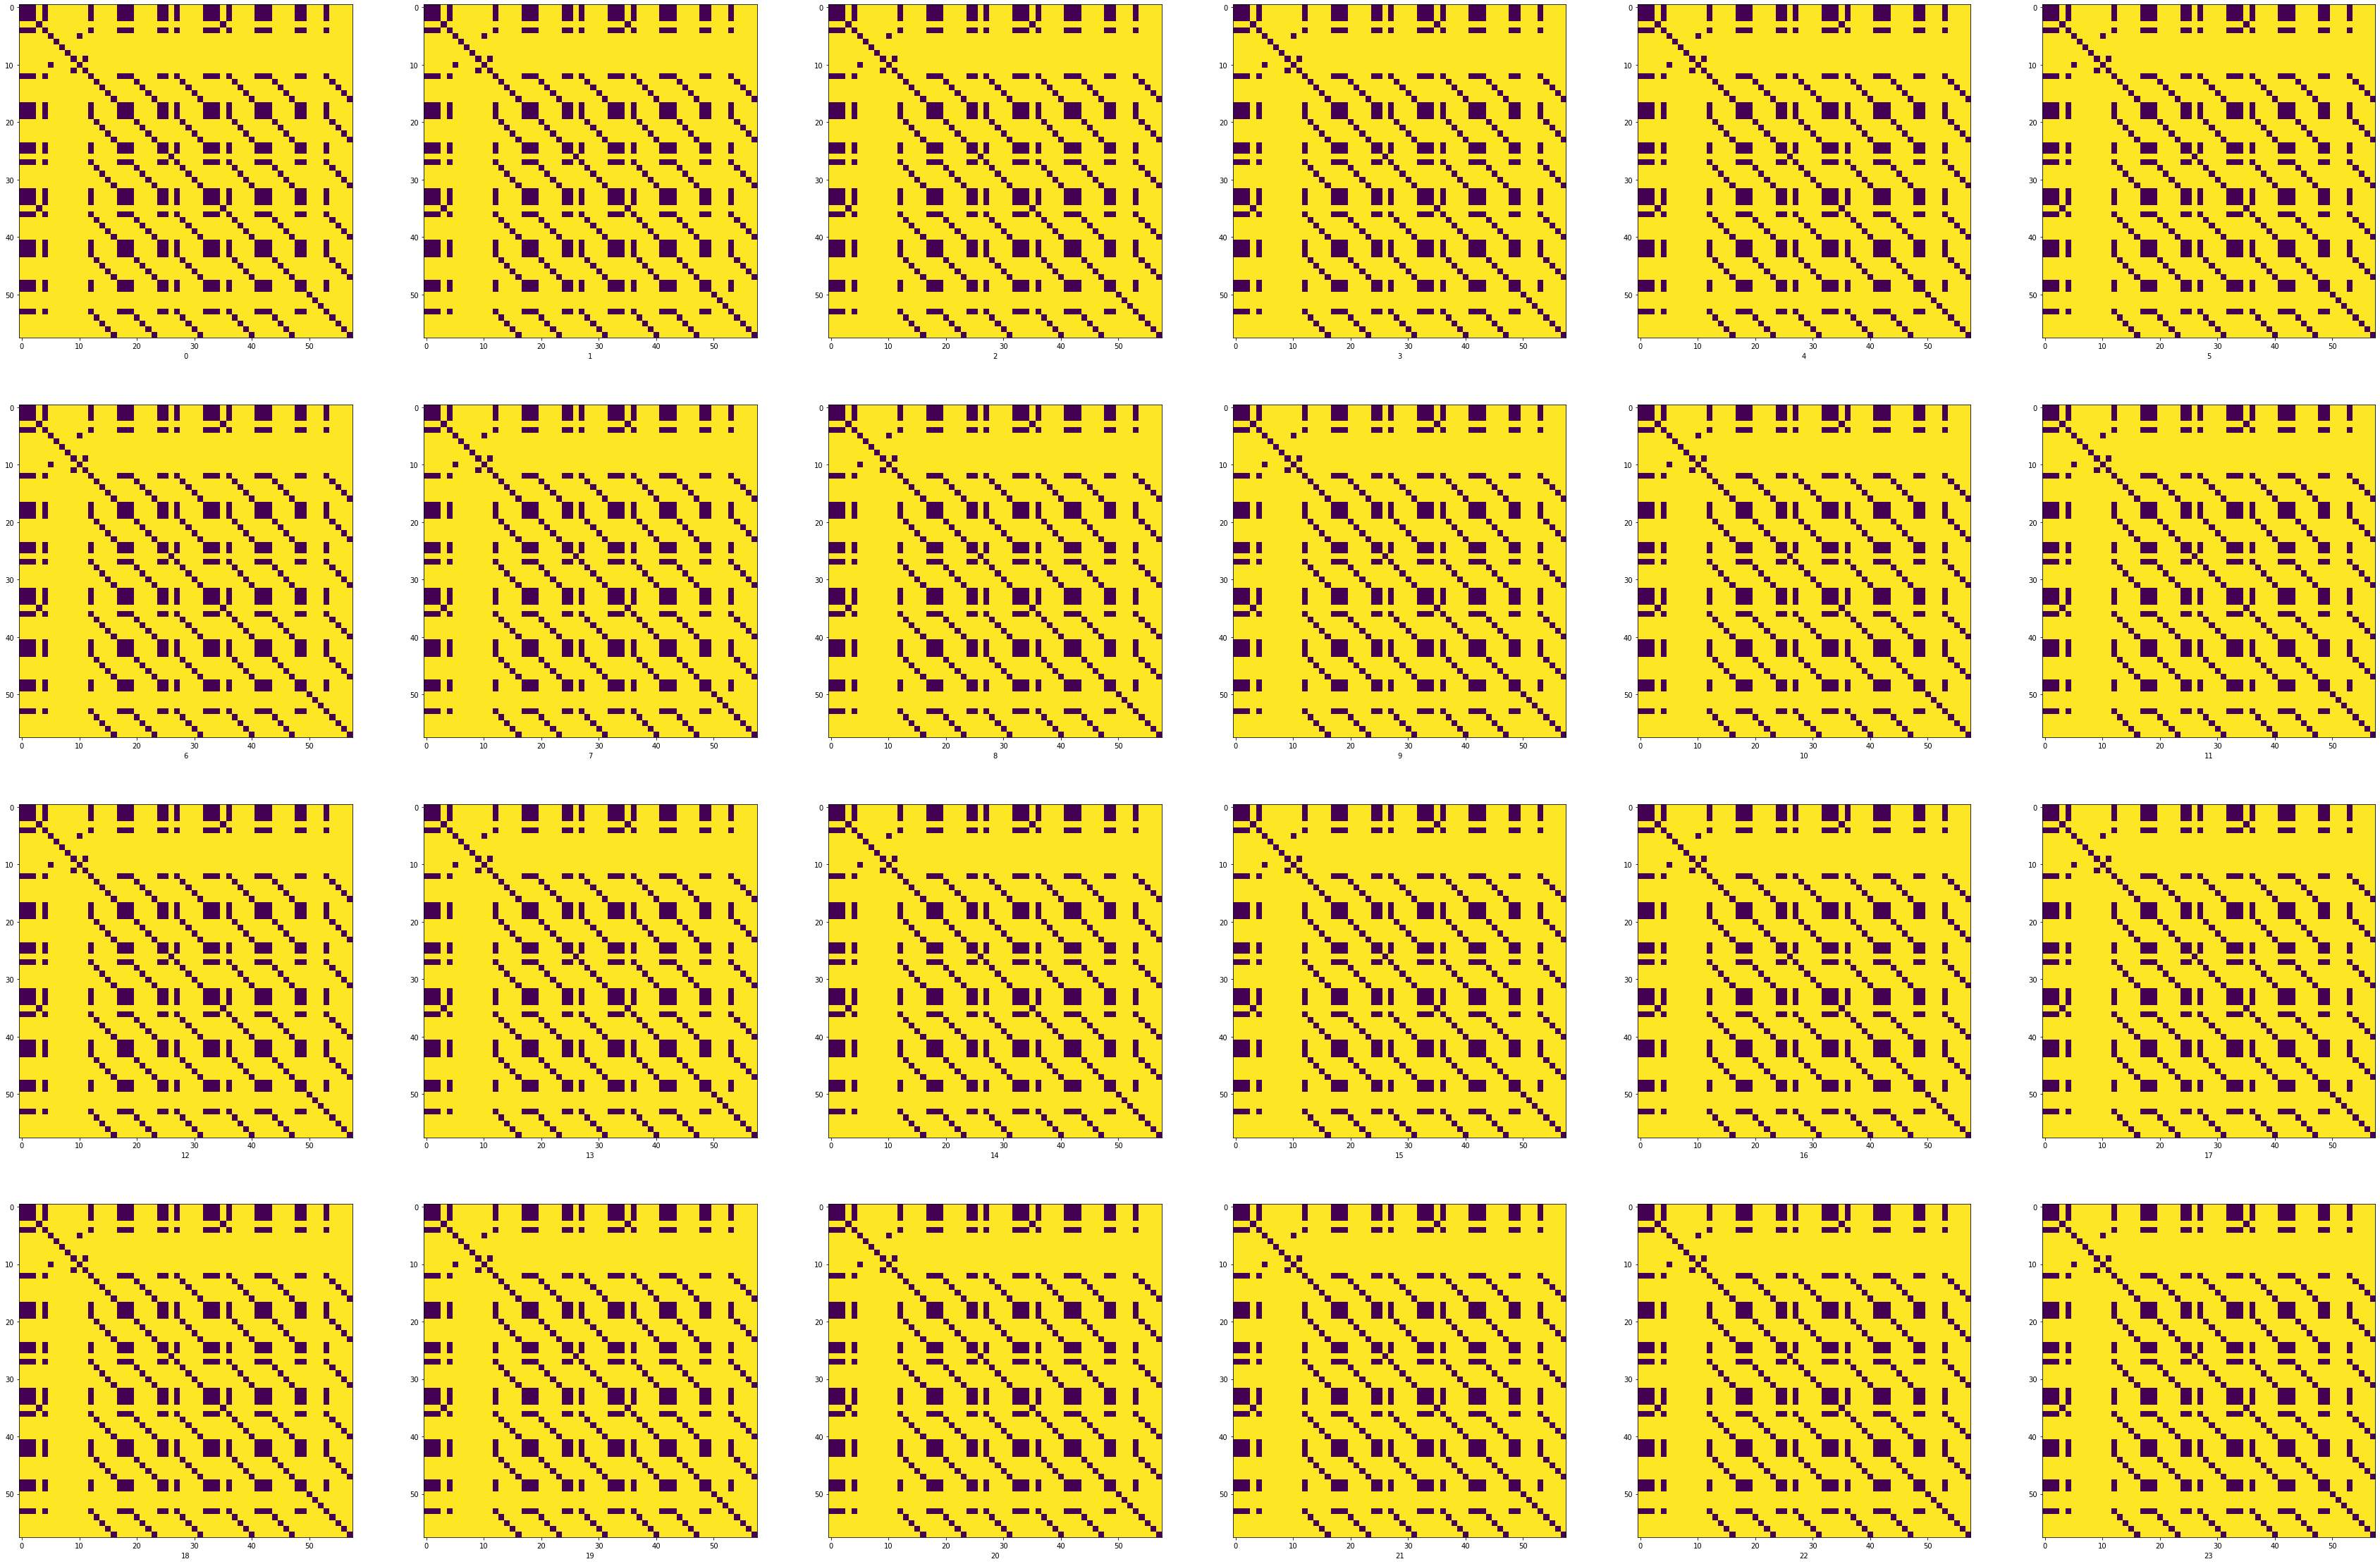

In [141]:
scaling = 10
fig, axs = plt.subplots(4,6, figsize=(scaling*6,scaling* 4)) # WTF is that ordering
for ax, (h, match) in zip(axs.flat, event_matching_d1.items()):
    ax.imshow(matching, aspect=1)
    ax.set_xlabel(h)

In [106]:
event_matching_d1.

<function dict.keys>